In [1]:
## Import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import dtale
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,ridge_regression,Lasso
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
## import the dataset
data=sns.load_dataset("tips")

In [3]:
## View the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
## lest check for null values
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [10]:
## check for duplicate records
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [11]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

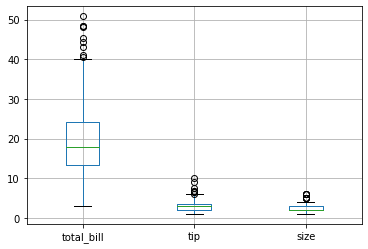

In [12]:
## lets check for the outliers in the data
data.boxplot()

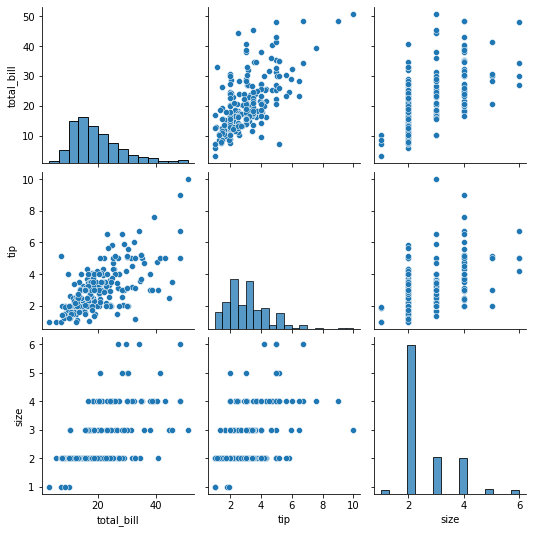

In [13]:
sns.pairplot(data)

<AxesSubplot:xlabel='size'>

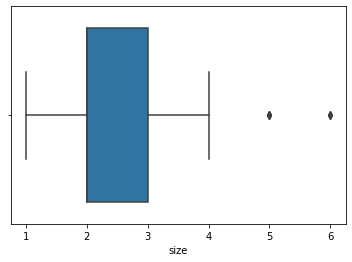

In [21]:
sns.boxplot(data['size'])

In [29]:
q=data['total_bill'].quantile(.95)

In [30]:
clean_data=data[data['total_bill']<q]

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
q=clean_data['tip'].quantile(.98)

In [33]:
clean_data=clean_data[data['tip']<q]

In [34]:
q=clean_data['size'].quantile(.99)

In [35]:
clean_data=clean_data[data['size']<q]

<AxesSubplot:xlabel='size'>

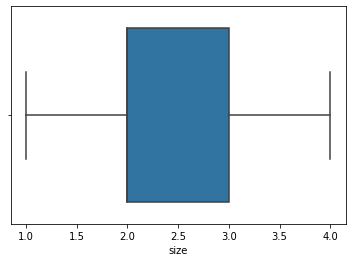

In [38]:
sns.boxplot(clean_data['size'])

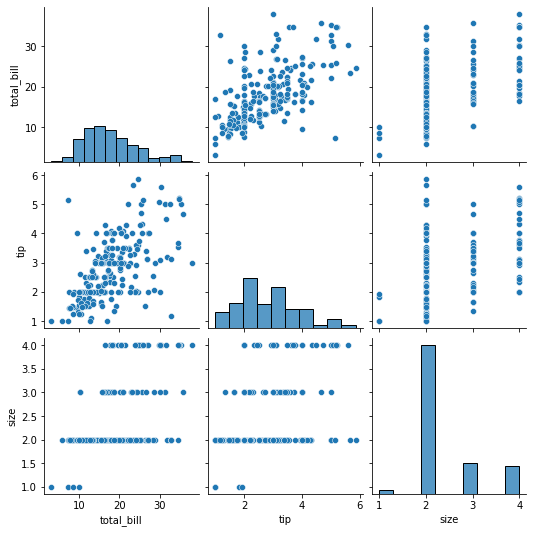

In [41]:
sns.pairplot(clean_data)

In [42]:
##now lets convert catogorical data into numerical.

pd.get_dummies(clean_data,drop_first=True)

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,3,1,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [43]:
clean_data.corr()

,total_bill,tip,size
total_bill,1.000000,0.600904,0.520990
tip,0.600904,1.000000,0.366362
size,0.520990,0.366362,1.000000


<AxesSubplot:>

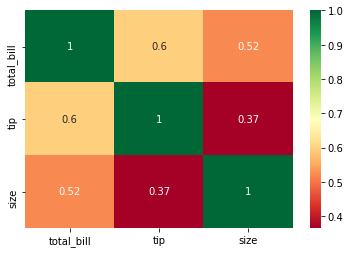

In [52]:
corrmat=clean_data.corr()
features=corrmat.index
sns.heatmap(corrmat[features],annot=True,cmap='RdYlGn')

In [51]:
corrmat.index

Index(['total_bill', 'tip', 'size'], dtype='object')

In [53]:
##lets select the model.
LR=LinearRegression()

In [54]:
clean_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
clean_data=pd.get_dummies(clean_data,drop_first=True)

In [126]:
y=clean_data['tip']

In [127]:
X=clean_data.drop(['tip'],axis=1)

In [128]:
X

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
238,35.83,3,1,1,0,1,0,1
240,27.18,2,1,0,0,1,0,1
241,22.67,2,0,0,0,1,0,1
242,17.82,2,0,1,0,1,0,1


In [173]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)

In [174]:
LR.fit(X_train,y_train)

LinearRegression()

In [175]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [176]:
y_pred=LR.predict(X_test)

In [177]:
r2_score(y_test,y_pred)

0.2171722151511466

In [178]:
mean_squared_error(y_test,y_pred)

0.9467101937465151

<AxesSubplot:xlabel='tip'>

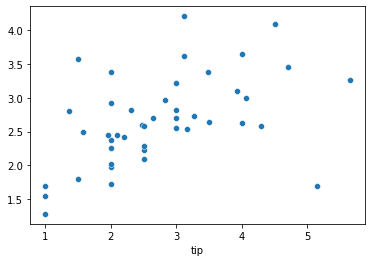

In [179]:
sns.scatterplot(y_test,y_pred)

<AxesSubplot:xlabel='tip', ylabel='Density'>

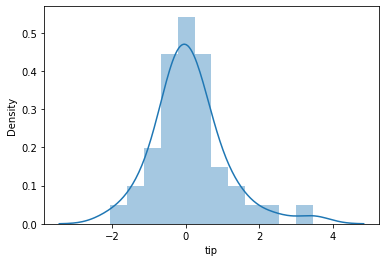

In [180]:
sns.distplot(y_test-y_pred)

In [181]:
from sklearn.linear_model import Ridge,LassoCV
model=LassoCV(cv=5)

In [182]:
model.fit(X_train,y_train)

LassoCV(cv=5)

In [183]:
y_pred=model.predict(X_test)

In [184]:
r2_score(y_test,y_pred)

0.22234138180135377

<AxesSubplot:xlabel='tip', ylabel='Density'>

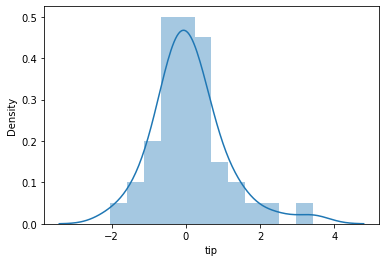

In [185]:
sns.distplot(y_test-y_pred)

<AxesSubplot:xlabel='tip', ylabel='Density'>

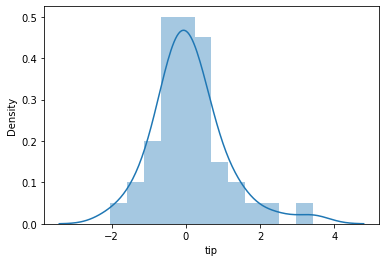

In [186]:
sns.distplot(y_test-y_pred)

In [187]:
model.coef_

array([0.09411518])

In [188]:
model.intercept_

1.0513563467943667

In [189]:
etr=ExtraTreesRegressor()

In [190]:
etr.fit(X,y)

ExtraTreesRegressor()

In [191]:
etr.feature_importances_

array([1.])

In [192]:
X

array([[16.99],
       [10.34],
       [21.01],
       [23.68],
       [24.59],
       [25.29],
       [ 8.77],
       [26.88],
       [15.04],
       [14.78],
       [10.27],
       [35.26],
       [15.42],
       [18.43],
       [14.83],
       [21.58],
       [10.33],
       [16.29],
       [16.97],
       [20.65],
       [17.92],
       [20.29],
       [15.77],
       [19.82],
       [17.81],
       [13.37],
       [12.69],
       [21.7 ],
       [19.65],
       [ 9.55],
       [18.35],
       [15.06],
       [20.69],
       [17.78],
       [24.06],
       [16.31],
       [16.93],
       [18.69],
       [31.27],
       [16.04],
       [17.46],
       [13.94],
       [ 9.68],
       [30.4 ],
       [18.29],
       [22.23],
       [28.55],
       [18.04],
       [12.54],
       [10.29],
       [34.81],
       [ 9.94],
       [25.56],
       [19.49],
       [38.01],
       [26.41],
       [11.24],
       [20.29],
       [13.81],
       [11.02],
       [18.29],
       [17.59],
       [

In [172]:
X=X.values.reshape(-1,1)

In [207]:
a=model.predict([[24]])

In [208]:
a

array([3.31012076])

In [204]:
clean_data.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


In [209]:
import pickle

In [217]:
pickle.dump(model,open('model.pkl','wb'))

In [218]:
m=pickle.load(open('model.pkl','rb'))

In [219]:
a=m.predict([[21]])

In [220]:
a

array([3.02777521])